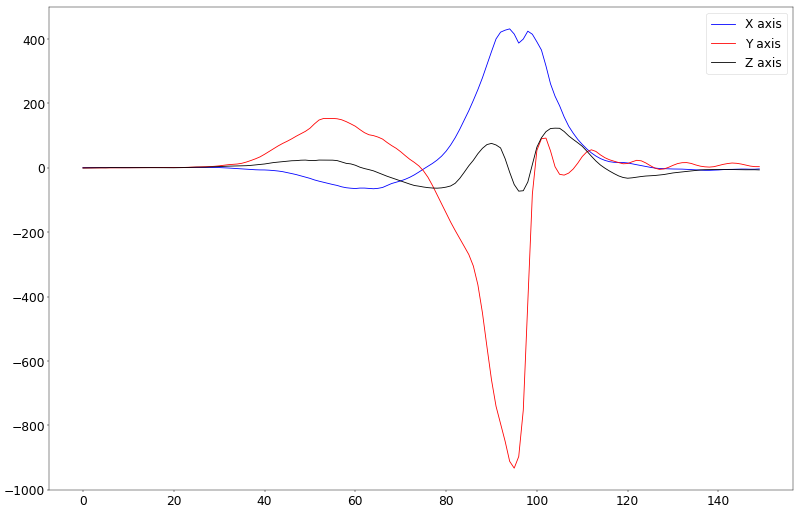

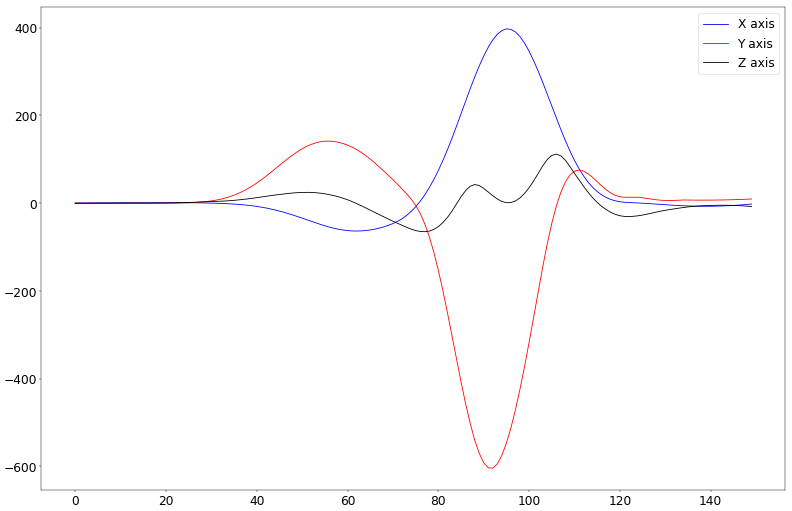

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
gyro_data_reference = pd.read_csv('./reference-fd-bw/gyro.csv', names=col_names)

TMP_START = 0
TMP_END = 150

font = {
    # 'weight': 'bold',
    'size': 22
}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 22})

xaxis = list(range(len(gyro_data_reference)))[TMP_START:TMP_END]
x_reference = gyro_data_reference['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = gyro_data_reference['Y'][TMP_START:TMP_END]
z_reference = gyro_data_reference['Z'][TMP_START:TMP_END]
fig1 = plt.figure(figsize=(24, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (x_reference), color="blue", label="X axis")
plt.plot(xaxis, (y_reference), color="red", label="Y axis")
plt.plot(xaxis, (z_reference), color="black", label="Z axis")
# plt.yaxis.label.set_size(40)
plt.legend()
plt.show()


# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
# z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)

fig2 = plt.figure(figsize=(24, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, (x_reference), color="blue", label="X axis")
plt.plot(xaxis, (y_reference), color="red", label="Y axis")
plt.plot(xaxis, (z_reference), color="black", label="Z axis")
plt.legend()
plt.show()



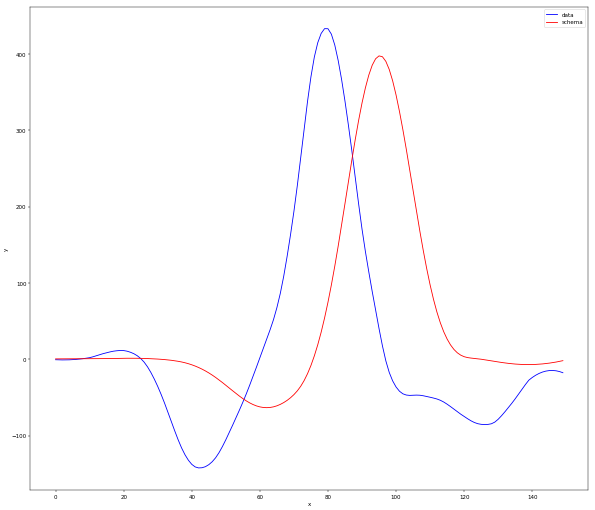

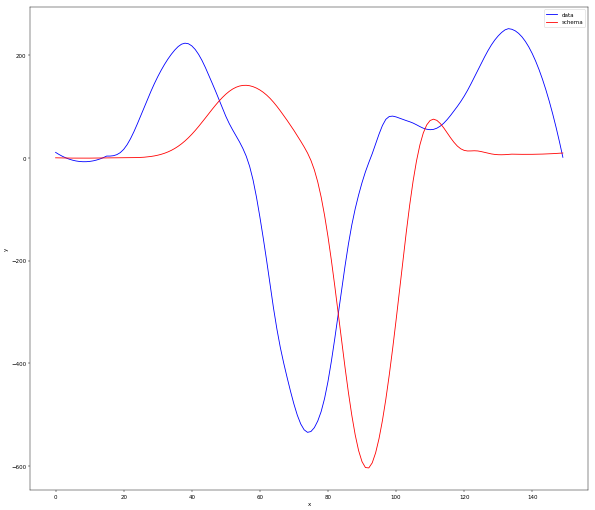

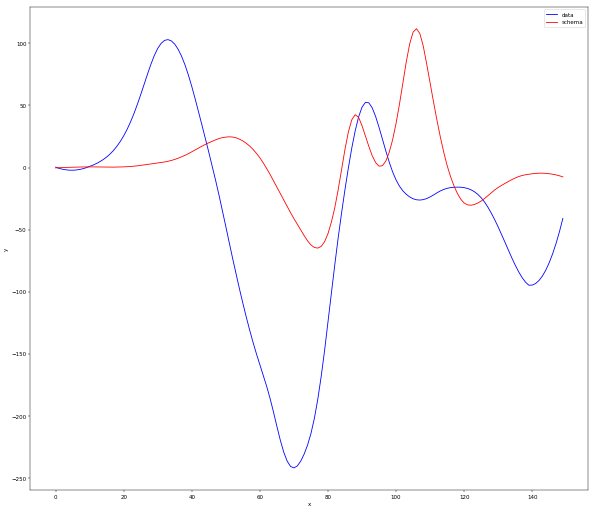

In [16]:

TMP_START = 0
TMP_END = 150

gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(gyro_data_forward)))[TMP_START:TMP_END]

x_normal = gyro_data_forward['X'][TMP_START:TMP_END]
y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
# x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
# y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, x_normal, color="blue", label="data")
plt.plot(xaxis, x_reference, color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, y_normal, color="blue", label="data")
plt.plot(xaxis, y_reference, color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, z_normal, color="blue", label="data")
plt.plot(xaxis, z_reference, color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [129]:
%pylab inline
from dtw import dtw
x_normal = gyro_data_forward['X']
y_normal = gyro_data_forward['Y']
z_normal = gyro_data_forward['Z']

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)

n_x = x_reference
n_y = y_reference
n_z = z_reference
dtw_x_data = []
dtw_y_data = []
dtw_z_data = []
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
dtw_step = 20
for it in range(0, 8000, dtw_step):
    k_x = x_normal[it:it+150]
    k_y = y_normal[it:it+150]
    k_z = z_normal[it:it+150]
    dist_x, cost_x, *_ = dtw(k_x, n_x, dist=lambda k, n: norm(k - n))
    dist_y, cost_y, *_ = dtw(k_y, n_y, dist=lambda k, n: norm(k - n))
    dist_z, cost_z, *_ = dtw(k_z, n_z, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost_x))
    dtw_y_data.append(mean(cost_y))
    dtw_z_data.append(mean(cost_z))


Populating the interactive namespace from numpy and matplotlib


/home/n3hrox/.pyenv/versions/3.6.1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


350


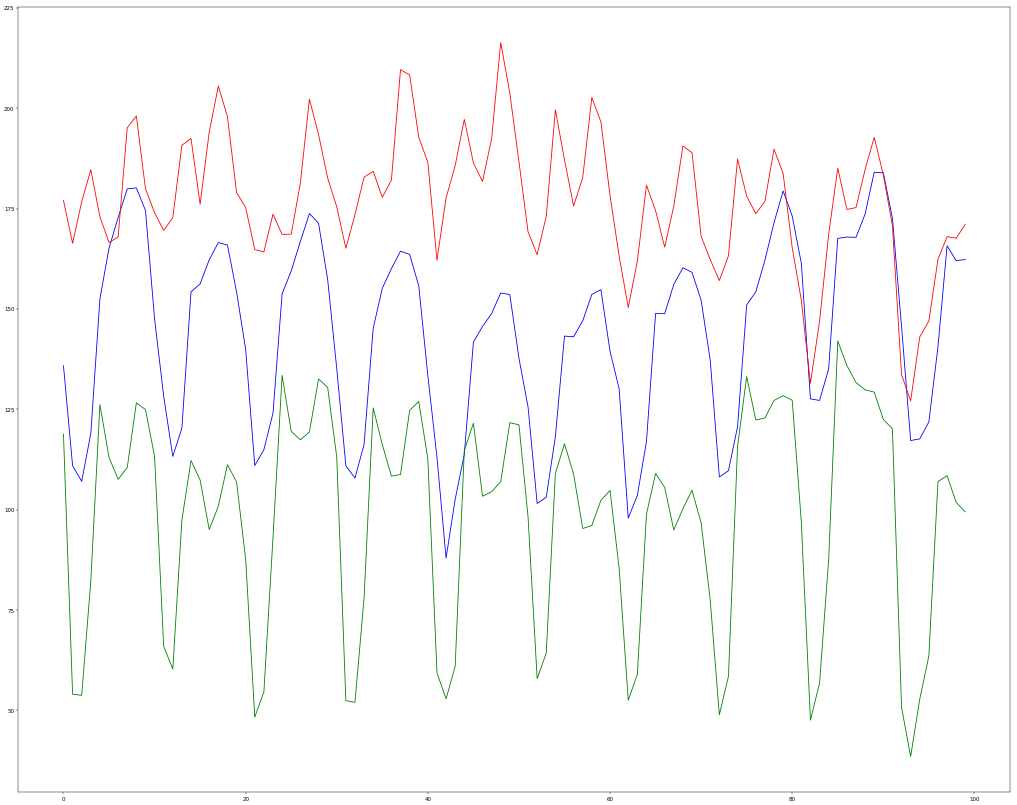

In [128]:
# Plot showing where local minimums are (these are the indexes we are searching for).
# Roughly every 150 indexes there should occur next minimum.
print(len(dtw_x_data))

TMP_START = 130
TMP_END = 230


xaxis = list(range(len(dtw_x_data[TMP_START:TMP_END])))
fig3 = plt.figure(figsize=(32, 26), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, dtw_x_data[TMP_START:TMP_END], color="blue", label="data")

plt.plot(xaxis, dtw_y_data[TMP_START:TMP_END], color="red", label="data")

plt.plot(xaxis, dtw_z_data[TMP_START:TMP_END], color="green", label="data")


In [126]:
minima_indexes = []
maxima_indexes = []
step = 5
look_forward = 10

# this indicates how many indexes will be cut from training set and used as test data
cut = 8 # this value is actually x2 because it is cut both from wrong and good gestures

"""
Looking at the graph above we can clearly notice that local minimas for X, Y 
and Z match in the same place - this allows us to save on computations and 
focus on making proper probability model for just one of them 
"""
for it in range(0, len(dtw_x_data)-look_forward, step):
    val = min(dtw_x_data[it:it+look_forward])
    val_max = max(dtw_x_data[it:it+look_forward])
    minima_indexes.append(dtw_x_data.index(val))
    maxima_indexes.append(dtw_x_data.index(val_max))

minima_indexes = list(set(minima_indexes))
maxima_indexes = list(set(maxima_indexes))

indexes = minima_indexes[:-cut] + maxima_indexes[:-cut]
test_indexes = minima_indexes[-cut:] + maxima_indexes[-cut:]

X_learn = []
fit_learn = []

X_test = []
fit_test = []
for it in test_indexes:
    start = it*20
    stop = start+150
    X_test.append([
        np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
        median(x_normal[start:stop]),
        max(x_normal[start:stop]), min(x_normal[start:stop])
    ])
    if it in minima_indexes:
        fit_test.append('Forward')
    else:
        fit_test.append('Wrong')

for it in indexes:
    start = it*20
    stop = start+150
    X_learn.append([
        np.std(x_normal[start:stop]), mean(x_normal[start:stop]),
        median(x_normal[start:stop]),
        max(x_normal[start:stop]), min(x_normal[start:stop])
    ])
    if it in minima_indexes:
        fit_learn.append('Forward')
    else:
        fit_learn.append('Wrong')


from sklearn import tree
clf = tree.DecisionTreeClassifier()
original = [np.std(x_reference), mean(x_reference), median(x_reference), max(x_reference), min(x_reference)]
clf = clf.fit(X_learn, fit_learn)
ans = clf.predict(X_test)

# Decision trees don't provide probability like naive bayes
print(ans == fit_test)




[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [123]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(X_learn, fit_learn)
answers = pred.predict(X_test)
print(f'Values that should occur: {fit_test}')
print(pred.predict(X_test))
print(pred.predict_proba(X_test)*100//1)


Values that should occur: ['Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Forward', 'Wrong', 'Wrong', 'Wrong', 'Wrong', 'Wrong', 'Wrong', 'Wrong', 'Wrong']
['Forward' 'Forward' 'Forward' 'Forward' 'Forward' 'Forward' 'Forward'
 'Forward' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong']
[[  99.    0.]
 [ 100.    0.]
 [  99.    0.]
 [  99.    0.]
 [  99.    0.]
 [  99.    0.]
 [ 100.    0.]
 [  99.    0.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]
 [   0.   99.]]


In [130]:
# neural network
X = X_learn
y = np.array(fit_learn).T

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_learn)
X_learn = scaler.transform(X_learn)
X_test = scaler.transform(X_test)
# MLP - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100000)
mlp.fit(X_learn, fit_learn)
predictions = mlp.predict(X_test)
print(predictions)

['Forward' 'Forward' 'Forward' 'Forward' 'Forward' 'Forward' 'Forward'
 'Forward' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong' 'Wrong']
